<a href="https://colab.research.google.com/github/2020-nlp-c/nlp-statisticsmodel/blob/master/jjc/topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling
### LSA 패키지에 포함되는 class

In [31]:
doc_ls = []
sent = '바나나 사과 포도 포도 짜장면'
doc_ls.append(sent)
sent = '사과 포도'
doc_ls.append(sent)
sent = '포도 바나나'
doc_ls.append(sent)
sent = '짜장면 짬뽕 탕수육'
doc_ls.append(sent)
sent = '볶음밥 탕수육'
doc_ls.append(sent)
sent = '짜장면 짬뽕'
doc_ls.append(sent)
sent = '라면 스시'
doc_ls.append(sent)
sent = '스시 짜장면'
doc_ls.append(sent)
sent = '가츠동 스시 소바'
doc_ls.append(sent)
sent = '된장찌개 김치찌개 김치'
doc_ls.append(sent)
sent = '김치 된장 짜장면'
doc_ls.append(sent)
sent = '비빔밥 김치'
doc_ls.append(sent)


In [32]:
doc_ls

['바나나 사과 포도 포도 짜장면',
 '사과 포도',
 '포도 바나나',
 '짜장면 짬뽕 탕수육',
 '볶음밥 탕수육',
 '짜장면 짬뽕',
 '라면 스시',
 '스시 짜장면',
 '가츠동 스시 소바',
 '된장찌개 김치찌개 김치',
 '김치 된장 짜장면',
 '비빔밥 김치']

In [50]:
import numpy as np
import itertools
from sklearn.decomposition import randomized_svd
import nltk

class LSA():
    #tdm_df는 클래스 변수로 저장
    a = 0

def tdm(doc_list):
    # TDM 생성
    total_token = itertools.chain(*list(map(lambda i : i.split(), doc_list)))
    unique_token = set(total_token)
    tdm_df = pd.DataFrame(unique_token, columns=['word']).set_index('word')
    
    for i, doc in enumerate(doc_list):
        fdist = nltk.FreqDist(doc.split())
        temp_df = pd.DataFrame(list(zip(fdist.keys(), fdist.values())), columns = ['word', 'count']).set_index('word')
        tdm_df[i] = temp_df['count']
    
    return tdm_df.fillna(0)

def lsa(tdm, dim):
    # LSA 생성
    tdm_matrix = np.array(tdm.T) # 문서-단어 행렬
    U, s, VT = randomized_svd(tdm_matrix,
                              n_components=dim,
                              n_iter=10,
                              random_state=None)
    # U, s, VT = np.linalg.svd(tdm_matrix) # 문서-주제 행렬, 주제 정보량(특이값), 주제-단어 행렬
    return U, s, VT
    # return U[:, :dim], s[:dim], np.matrix(VT[:dim, :])

def topic_modeling(tdm, VT, word_count):
    # Topic Modeling
    tm_df = pd.DataFrame(VT).T.set_index(tdm.index)
    print('--- Topic Modeling ---')
    for i in tm_df:
        print('Topic {} - '.format(i+1), end='')
        indexs = list(tm_df.sort_values(by=i, ascending=False)[i][:word_count].index)
        values = list(map(lambda i : round(i, 3), tm_df.sort_values(by=i, ascending=False)[i][:word_count].values))
        print(dict(zip(indexs,values)))

def word_sim(tdm, VT, *words):
    ws_df = pd.DataFrame(VT).T.set_index(tdm.index).T
    print('---word similarity---')

    final_result = []
    for word1 in words:
        temp = []
        for word2 in words:
            temp.append(cos_sim(ws_df[word1], ws_df[word2]))
        final_result.append(temp)
    return pd.DataFrame(final_result, index = words, columns = words)

def doc_sim(tdm, U, *docs):
    ds_df = pd.DataFrame(U, columns=['Topic_{}'.format(i) for i in range(1,len(U.T)+1)])
    print('---docs similarity---')

    final_result = []
    for doc1 in docs:
        temp = []
        for doc2 in docs:
            temp.append(cos_sim(ds_df.T[doc1], ds_df.T[doc2]))
        final_result.append(temp)
    return pd.DataFrame(final_result, index = docs, columns = docs)

def doc_word_sim(tdm, U, VT):
    dws_df = pd.DataFrame(U.dot(VT), columns = tdm.index)
    print('---doc, word similarity---')
    return dws_df

def cos_sim(vec1, vec2):
    a = np.sqrt((np.array(vec1)**2).sum())
    b = np.sqrt((np.array(vec2)**2).sum())
    return float(np.matrix(vec1).dot(np.matrix(vec2).T)/(a * b))


In [51]:
import pandas as pd
tdm_df = tdm(doc_ls)

In [52]:
tdm_df

,0,1,2,3,4,5,6,7,8,9,10,11
word,,,,,,,,,,,,
볶음밥,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
사과,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
짬뽕,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
스시,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
된장찌개,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
탕수육,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
라면,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
된장,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
비빔밥,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
u, s, vt = lsa(tdm_df, 4)

In [54]:
topic_modeling(tdm_df, vt, 3)

--- Topic Modeling ---
Topic 1 - {'포도': 0.697, '짜장면': 0.486, '바나나': 0.348}
Topic 2 - {'짜장면': 0.584, '짬뽕': 0.356, '김치': 0.337}
Topic 3 - {'김치': 0.611, '된장찌개': 0.264, '김치찌개': 0.264}
Topic 4 - {'스시': 0.552, '김치': 0.371, '가츠동': 0.277}


In [55]:
word_sim(tdm_df, vt, '김치', '김치찌개', '탕수육')

---word similarity---


,김치,김치찌개,탕수육
김치,1.000000,0.978699,-0.251469
김치찌개,0.978699,1.000000,-0.436448
탕수육,-0.251469,-0.436448,1.000000


In [ ]:
doc_sim(tdm_df, u, 0,1,3)

---docs similarity---


,0,1,3
0,1.000000,0.934065,0.078413
1,0.934065,1.000000,-0.261173
3,0.078413,-0.261173,1.000000


In [ ]:
doc_word_sim(tdm_df, u, vt)

---doc, word similarity---


word,김치찌개,가츠동,된장,짜장면,짬뽕,비빔밥,볶음밥,사과,탕수육,라면,바나나,김치,스시,포도,소바,된장찌개
0,-0.006490,-0.005735,0.006996,0.245773,0.007893,-0.005226,-0.007792,0.325064,-0.006776,-0.004424,0.325064,-0.004720,-0.000391,0.650129,-0.005735,-0.006490
1,-0.000565,-0.002258,-0.017291,0.006439,-0.066109,-0.002179,-0.015966,0.161459,-0.055308,-0.003097,0.161459,-0.020034,-0.019464,0.322918,-0.002258,-0.000565
2,-0.000565,-0.002258,-0.017291,0.006439,-0.066109,-0.002179,-0.015966,0.161459,-0.055308,-0.003097,0.161459,-0.020034,-0.019464,0.322918,-0.002258,-0.000565
3,-0.070844,-0.057063,0.055305,0.476845,0.362549,-0.042361,0.075625,-0.038326,0.286415,-0.032551,-0.038326,-0.057900,-0.031639,-0.076652,-0.057063,-0.070844
4,-0.044192,-0.039022,0.001831,0.127979,0.127470,-0.028483,0.030966,-0.023758,0.106590,-0.024512,-0.023758,-0.070844,-0.057063,-0.047516,-0.039022,-0.044192
5,-0.038335,-0.028717,0.051990,0.373006,0.262784,-0.021536,0.051845,-0.019890,0.203604,-0.014882,-0.019890,-0.007881,0.007755,-0.039780,-0.028717,-0.038335
6,-0.007267,0.184395,-0.005826,0.040306,-0.047433,-0.006123,-0.024512,-0.007520,-0.057063,0.126322,-0.007520,-0.019217,0.408706,-0.015040,0.184395,-0.007267
7,-0.011473,0.139089,0.038389,0.271431,0.109330,-0.005826,0.006470,-0.004342,0.064446,0.097990,-0.004342,0.021090,0.351023,-0.008683,0.139089,-0.011473
8,-0.007743,0.269617,-0.011473,0.036100,-0.085781,-0.007267,-0.039022,-0.007994,-0.096085,0.184395,-0.007994,-0.026484,0.593101,-0.015987,0.269617,-0.007743
9,0.232090,-0.007743,0.151769,0.024627,-0.109179,0.161621,-0.044192,-0.007054,-0.115036,-0.007267,-0.007054,0.545480,-0.026484,-0.014109,-0.007743,0.232090


# Gensim 사용

In [17]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import TfidfModel

doc_token = [doc.split() for doc in doc_ls]
n_dim = 3

id2word = corpora.Dictionary(doc_token)
corpus_TDM = [id2word.doc2bow(text) for text in doc_token]
tfidf = TfidfModel(corpus_TDM)
corpus_TFIDF = tfidf[corpus_TDM]
model_LSA = LsiModel(corpus_TFIDF, id2word=id2word, num_topics = n_dim)

for top in model_LSA.print_topics(n_dim, 3):
    print(top)

(0, '0.701*"포도" + 0.453*"바나나" + 0.453*"사과"')
(1, '-0.620*"짬뽕" + -0.465*"짜장면" + -0.370*"탕수육"')
(2, '-0.695*"스시" + -0.384*"라면" + 0.350*"짬뽕"')


# 시각화

### 시각화 함수 설정

In [19]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def calc_similarity_matrix(vectors) :
  def cosine_similarity(a, b) : 
    return dot(a, b)/(norm(a)*norm(b))

  n_word = len(vectors)
  similarity_matrix = np.zeros((n_word, n_word))

  for i in range(n_word) :
    for j in range(i, n_word) :
      similarity_matrix[j, i] = cosine_similarity(vectors[i], vectors[j]).round(4)  

  return similarity_matrix

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix) :
  uniform_data = similarity_matrix
  mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
  plt.rcParams['figure.figsize'] = [8, 6]
  ax = sns.heatmap(uniform_data, mask=mask, #xticklabels=features, yticklabels=features, 
                  annot=True, fmt=".2f",annot_kws={'size':8}, cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
from sklearn.manifold import TSNE
import numpy as np

def visualize_vectors(vectors, labels):
  tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
  np.set_printoptions(suppress=True)
  T = tsne.fit_transform(vectors)
  #labels = vocab

  plt.figure(figsize=(10, 6))
  plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
  for label, x, y in zip(labels, T[:, 0], T[:, 1]):
      plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

### 단어 행렬 생성

In [24]:
from gensim.matutils import sparse2full
corpus_VT = model_LSA[corpus_TDM]
VT = [sparse2full(doc_vector, n_dim).tolist() for doc_vector in corpus_VT]
VT

[[2.5380523204803467, 0.2637287378311157, -0.017990294843912125],
 [1.1533889770507812, 0.3641341030597687, 0.019127046689391136],
 [1.1533889770507812, 0.3641341030597687, 0.019127046689391136],
 [0.4742041230201721, -1.454484462738037, 0.5893338918685913],
 [0.10655982792377472, -0.5031526684761047, 0.45600998401641846],
 [0.3906930685043335, -1.0841857194900513, 0.2936365604400635],
 [0.11986978352069855, -0.442129522562027, -1.0793319940567017],
 [0.3261394798755646, -0.792179524898529, -0.7515482306480408],
 [0.12516476213932037, -0.46951356530189514, -1.1980746984481812],
 [0.03917824476957321, -0.1378154307603836, -0.06873229146003723],
 [0.30162549018859863, -0.6786689758300781, -0.13118025660514832],
 [0.037520844489336014, -0.1297774463891983, -0.06192014738917351]]

In [25]:
for i in id2word.keys() :
    print("{} : {}".format(id2word[i], model_LSA.projection.u[i]))

바나나 : [0.45276905 0.1429428  0.00750843]
사과 : [0.45276905 0.1429428  0.00750843]
짜장면 : [ 0.23127448 -0.46453947 -0.05624439]
포도 : [0.70061991 0.2211913  0.01161862]
짬뽕 : [ 0.15941859 -0.61964629  0.34988095]
탕수육 : [ 0.08351104 -0.37029865  0.29569732]
볶음밥 : [ 0.02304879 -0.13285401  0.16031266]
라면 : [ 0.02500479 -0.11448946 -0.38402815]
스시 : [ 0.094865   -0.32764006 -0.69530387]
가츠동 : [ 0.01514989 -0.07093674 -0.25138539]
소바 : [ 0.01514989 -0.07093674 -0.25138539]
김치 : [ 0.02969401 -0.09617157 -0.03988885]
김치찌개 : [ 0.00474212 -0.02082193 -0.01442172]
된장찌개 : [ 0.00474212 -0.02082193 -0.01442172]
된장 : [ 0.04065701 -0.11795794 -0.03504701]
비빔밥 : [ 0.00782683 -0.03360588 -0.02203129]


### 단어 벡터

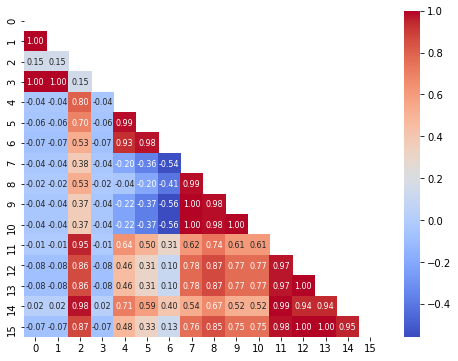

In [26]:
word_vectors = model_LSA.projection.u
word_similarity_matrix = calc_similarity_matrix(word_vectors)
visualize_similarity(word_similarity_matrix)

### 문서 벡터

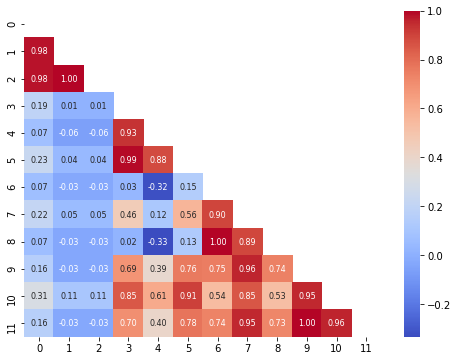

In [27]:
from gensim.matutils import sparse2full
corpus_v = model_LSA[corpus_TDM]
v = [sparse2full(doc_vector, n_dim).tolist() for doc_vector in corpus_VT]

doc_vectors = v
doc_similarity_matrix = calc_similarity_matrix(doc_vectors)
visualize_similarity(doc_similarity_matrix)

### 벡터 시각화

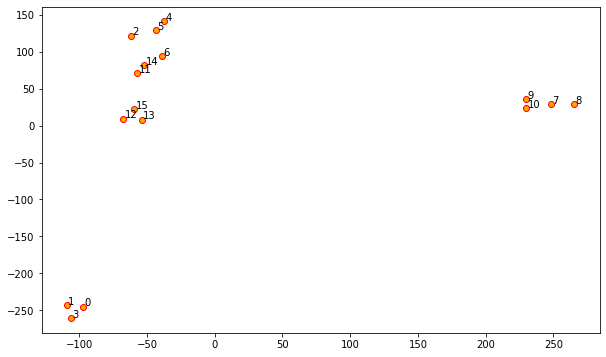

In [28]:
vectors = word_vectors
labels = [k for k in id2word.keys()]
visualize_vectors(vectors, labels)